In [41]:
import numpy as np

# loss_file_list = ['./loss_histogram/ssl_loss/imnetc_gaussian_noise_s', 
#                   './loss_histogram/ssl_loss/imnetc_defocus_blur_s', 
#                  './loss_histogram/ssl_loss/imnetc_snow_s',
#                  './loss_histogram/ssl_loss/imnetc_contrast_s']
num = 3
corruption_name = ['Frost', 'Motion Blur', 'Gaussian Noise', 'Pixelate']
corr = ['frost', 'motionblur', 'gaussian', 'pixelate']

loss_list = np.load(f'./loss_histogram/{corr[num]}_marginal_result.npy', allow_pickle=True)
print(loss_list.shape)
corr_loss, ours_loss = np.round(loss_list,2)
print(corr_loss.mean(), corr_loss.max(), corr_loss.min())
print(ours_loss.mean(), ours_loss.max(), ours_loss.min())


(2, 200)
1.55945 5.61 0.0
1.3246999999999998 5.02 0.0


In [42]:
orig_loss = np.load(f'./loss_histogram/entropy_{corr[num]}_result1.npy', allow_pickle=True)
dda_loss = np.load(f'./loss_histogram/entropy_{corr[num]}_result2.npy', allow_pickle=True)
print(orig_loss.shape)
print(orig_loss.mean(), orig_loss.min(), orig_loss.max())
print(dda_loss.shape)
print(dda_loss.mean(), dda_loss.min(), dda_loss.max())

(1000, 1)
1.5498768157469074 2.087430175379268e-06 5.549169063568115
(1000, 1)
2.6503290525847696 0.0009271620656363666 5.691051006317139


[    Corruption      loss
0         orig  0.836772
1         orig  1.193331
2         orig  0.192768
3         orig  0.526732
4         orig  3.590652
..         ...       ...
195       orig  0.442570
196       orig  0.178462
197       orig  1.728606
198       orig  0.256034
199       orig  0.251920

[200 rows x 2 columns],     Corruption  loss
0         corr  3.83
1         corr  1.56
2         corr  0.89
3         corr  0.59
4         corr  4.84
..         ...   ...
195       corr  1.91
196       corr  1.56
197       corr  2.67
198       corr  0.76
199       corr  0.44

[200 rows x 2 columns],     Corruption      loss
0          dda  4.602733
1          dda  1.898791
2          dda  0.749421
3          dda  0.699058
4          dda  3.294295
..         ...       ...
195        dda  2.731035
196        dda  1.631903
197        dda  1.449393
198        dda  1.781558
199        dda  3.964897

[200 rows x 2 columns],     Corruption  loss
0         ours  1.93
1         ours  1.32
2        

/tmp/ipykernel_1343857/1320689095.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_list[0].append(data_list[1]).append(data_list[2]).append(data_list[3])
/tmp/ipykernel_1343857/1320689095.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_list[0].append(data_list[1]).append(data_list[2]).append(data_list[3])
/tmp/ipykernel_1343857/1320689095.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(axs.get_yticks(), fontsize=18)


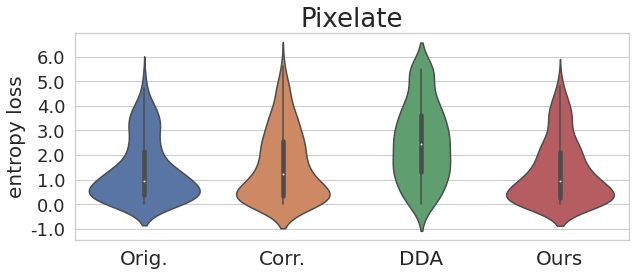

In [43]:
from matplotlib import colors as mcolors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

import seaborn
    
    


severity = [1,2,3,4,5]
hatch_list = ['+', '/', '.', '/',  '/']
corr_list = ['ours', 'dda', 'corr', 'orig']
c_list = ['green', 'blue', 'darkorange', 'blue', 'crimson']
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

data_list = []
seaborn.set(style = 'whitegrid')
d = pd.DataFrame({ 'Corruption' : np.repeat(corr_list[3], 200), 'loss': orig_loss[:200, 0]})
data_list.append(d)
d = pd.DataFrame({ 'Corruption' : np.repeat(corr_list[2], 200), 'loss': corr_loss[:200]})
data_list.append(d)
d = pd.DataFrame({ 'Corruption' : np.repeat(corr_list[1], 200), 'loss': dda_loss[:200, 0]})
data_list.append(d)
d = pd.DataFrame({ 'Corruption' : np.repeat(corr_list[0], 200), 'loss': ours_loss[:200]})
data_list.append(d)


print(data_list)
df = data_list[0].append(data_list[1]).append(data_list[2]).append(data_list[3])
b = sns.violinplot(ax=axs, x='Corruption', y='loss', data=df)

# for tick in axes[i].get_xticklabels():
#     tick.set_rotation(40)

axs.set_xlabel('')
axs.set_ylabel('entropy loss', fontsize=20)
# if i == 1:
#     axs.set_ylabel('')
axs.set_yticklabels(axs.get_yticks(), fontsize=18)
axs.set_xticklabels(['Orig.', 'Corr.', 'DDA', 'Ours'], fontsize=20)
axs.set_title(f'{corruption_name[num]}', fontsize=26)

# d = pd.DataFrame({ 'Corruption' : np.repeat(corr_list[3], 200), 'loss': ours_loss[:200]})
# data_list.append(d)

# axs.violinplot(ours_loss[:200], showmeans=False, showmedians=True)
# axs.violinplot(dda_loss[:200], showmeans=False, showmedians=True)
# axs.violinplot(corr_loss[:200], showmeans=False, showmedians=True)

# corr_counts, corr_bins = np.histogram(corr_loss[:200], 60)
# ours_counts, ours_bins = np.histogram(ours_loss[:200], 60)
# dda_counts, dda_bins = np.histogram(dda_loss[:200], 60)


# axs.plot(corr_bins[:-1], corr_counts, alpha = 0.8, label='corr.', color=colors['steelblue'])
# axs.plot(ours_bins[:-1], ours_counts, alpha = 0.8, label='ours.', color=colors['green'])
# axs.plot(dda_bins[:-1], dda_counts, alpha = 0.8, label='ours.', color=colors['darkorange'])
# axs.hist(corr_loss[:200], bins=np.arange(60)/10, histtype='stepfilled', alpha = 0.8, label='corr.', color=colors['steelblue'])
# axs.hist(ours_loss[:200], bins=np.arange(60)/10, histtype='stepfilled', alpha = 0.8, label='ours.', color=colors['green'])
# axs.hist(dda_loss[:200], bins=np.arange(60)/10, histtype='stepfilled', alpha = 0.5 , label=f'dda', color=colors['darkorange'])



# axs.set_xlabel('Contrastive Loss', fontsize=24)
    
# axs.legend(loc='upper left', fontsize=18)
# axs.set_ylabel('Number of Batch', fontsize=24)
               
plt.tight_layout()
# plt.show()
plt.savefig(f'./loss_histogram/{corruption_name[num]}_entropy.png', dpi=200)


# fig, axs = plt.subplots(1, 4, figsize=(24, 6))  
# for i in range(len(loss_file_list)):
#     corrupt_loss_list = []
#     for s in severity:
#         loss_list = np.load(loss_file_list[i] + str(s) +'.npy', allow_pickle=True)
#         corrupt_loss = np.round(loss_list[0],2)
#         print(corrupt_loss.shape)
#         corrupt_loss_list.append(corrupt_loss)
#         # corr_loss = loss_list[1]
#         # corrupt_reverse_loss = np.round(loss_list[1],2)
#         # print(corrupt_loss.max(), corrupt_loss.min())
#         print(corrupt_loss.max(), corrupt_loss.min())
# #         print(corrupt_reverse_loss.max(), corrupt_reverse_loss.min())

#     axs[i].hist(orig_loss, bins=np.arange(40)/10, histtype='stepfilled', alpha = 0.8, label='Original.', color=colors['steelblue'])
#     for s in [1,3,5]:
# #         axs[i].hist(corrupt_loss_list[s-1], bins=np.arange(40)/10, histtype='stepfilled' , label=f'Corrupted. Severity:{s}', hatch=hatch_list[s-1])
#           axs[i].hist(corrupt_loss_list[s-1], bins=np.arange(40)/10, histtype='stepfilled', alpha = 0.5 , label=f'Corrupted. Severity:{s}', color=colors[c_list[s-1]])
# #     plt.hist(corrupt_reverse_loss, bins=np.arange(50)/10, edgecolor="white",alpha = 0.6, label='corruption reverse loss')
#     print(corruption_name[i])
#         axs[i].tick_params(axis='both', which='major', labelsize=18)
#     axs[i].set_title(f'{corruption_name[i]}', fontsize=26)
#     axs[i].set_xlabel('Contrastive Loss', fontsize=24)
    
#     if i==0:
#         axs[i].legend(loc='upper left', fontsize=18)
#         axs[i].set_ylabel('Number of Batch', fontsize=24)
               
# plt.tight_layout()
# plt.savefig('./output/imagnetc_loss_histogram.png', dpi=200)

In [34]:
source_only = [25, 21.5, 24.2, 37.2, 15.9, 35, 33.8, 34.9, 30.8, 46.8, 67.8, 44.9, 54.7, 44.5, 56.3]
dda = [33.4, 33.5, 33.3, 30.3, 17.8, 29.7, 29.5, 30, 27.8, 37.8, 63, 36.3, 49.8, 50.1, 55.2]
without_marginal = [30.9, 25.5, 31.2, 36.9, 27.2, 35.6, 33.9, 37.9, 37.4, 40.3, 67, 38.2, 57.1, 47, 58.5]
ours = [37.7, 33.7, 39.7, 33.6, 32.2, 38.7, 36.1, 37.2, 40.7, 42.7, 68.4, 40.2, 59.6, 49.7, 61.5]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), [0.18, 1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18, 8.18, 9.18, 10.18, 11.18, 12.18, 13.18, 14.18], [0.36, 1.3599999999999999, 2.3600000000000003, 3.3600000000000003, 4.359999999999999, 5.359999999999999, 6.359999999999999, 7.359999999999999, 8.36, 9.36, 10.36, 11.36, 12.36, 13.36, 14.36], [0.54, 1.5399999999999998, 2.5400000000000005, 3.5400000000000005, 4.539999999999999, 5.539999999999999, 6.539999999999999, 7.539999999999999, 8.54, 9.54, 10.54, 11.54, 12.54, 13.54, 14.54]]


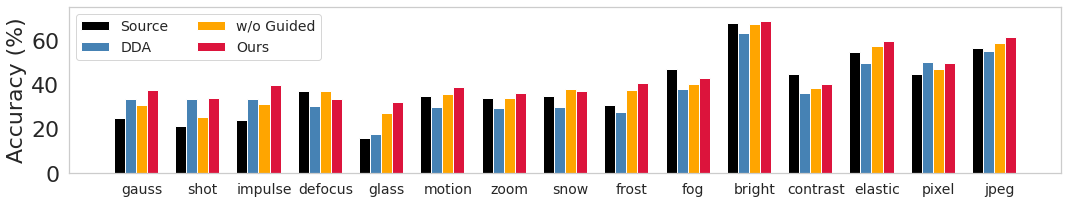

In [40]:
label_list=['Source','DDA', 'w/o Guided', 'Ours']
iter_list = [2, 4, 8, 16, 32]

plt.figure(figsize=(15,3))
plt.grid(False)

barWidth=0.18
br_list = []
br1 = np.arange(len(source_only))
br_list.append(br1)
for i in range(1,4):    
    br_list.append([x + barWidth for x in br_list[i-1]])

print(br_list)

# plt.plot(br_list[0], np.repeat(orig_acc, 5), '--', color=colors['gray'], linewidth=2)

plt.bar(br_list[0], source_only, color=colors['black'], width = barWidth, label=label_list[0])
# plt.plot(br_list[0], avg_result[0], '--', color=colors['black'], linewidth=2)
plt.bar(br_list[1], dda, color=colors['steelblue'], width = barWidth, label=label_list[1])
# plt.plot(br_list[1], avg_result[1], '--', color=colors['steelblue'], linewidth=2)
plt.bar(br_list[2], without_marginal, color=colors['orange'], width = barWidth, label=label_list[2])
plt.bar(br_list[3], ours, color=colors['crimson'], width = barWidth, label=label_list[3])
# plt.plot(br_list[2], avg_result[2], '--', color=colors['crimson'], linewidth=2)
# plt.bar(br_list[3], result[3], color=colors['gray'], width = barWidth, label=label_list[3])
# plt.plot(br_list[3], result[3], '--', color=colors['gray'], linewidth=2)

# for i in range(len(avg_result)):
#     plt.plot(br_list[i], avg_result[i], '--', linewidth=2, label=label_list[i])

myticks = ["gauss", "shot", "impulse", "defocus", "glass", "motion", "zoom", "snow", "frost", "fog", "bright", 
           "contrast", "elastic", "pixel", "jpeg"]
plt.xticks(br_list[2], myticks ,fontsize=14)
plt.yticks(fontsize=22)
plt.ylim(0,75)

# plt.title('Accuracy v.s. Batch size', fontsize=26)
# plt.xlabel('Batch Size', fontsize=26)
plt.ylabel('Accuracy (%)', fontsize=22)
plt.legend(fontsize=14, loc='upper left',  ncol = 2)

plt.tight_layout()
# plt.show()
plt.savefig('./output/corruption_result.png', dpi=200)